In [1]:
from PyEIS import *
folder='MPT files/'
filename = "1_58V_10cyc.mpt"

ex1 = EIS_exp(path=folder, data=[filename], mask=["none",4])
ex1.EIS_plot(legend='potential', bode='on')

ModuleNotFoundError: No module named 'PyEIS'

/home/codespace/.python/current/lib/python3.10/site-packages/lmfit/minimizer.py:447: RuntimeWarning: ignoring `maxfev` argument to `Minimizer()`. Use `max_nfev` instead.
  warnings.warn(maxeval_warning.format(maxnfev_alias, 'Minimizer'),


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 129
    # data points      = 94
    # variables        = 7
    chi-square         = 7.7774e-04
    reduced chi-square = 8.9396e-06
    Akaike info crit   = -1086.02657
    Bayesian info crit = -1068.22351
[[Variables]]
    Rs:  10.6065280 +/- 0.25579327 (2.41%) (init = 11)
    R:   1.51800321 +/- 0.30327065 (19.98%) (init = 1.5)
    n:   0.69755923 +/- 0.12835195 (18.40%) (init = 1)
    Q:   3.5339e-04 +/- 4.2647e-04 (120.68%) (init = 3.2e-05)
    R2:  65.2658184 +/- 0.19833456 (0.30%) (init = 64)
    n2:  0.97512623 +/- 0.00235917 (0.24%) (init = 1)
    Q2:  1.3290e-04 +/- 1.4019e-06 (1.05%) (init = 0.00012)
[[Correlations]] (unreported correlations are < 0.100)
    C(n, Q)   = -0.9559
    C(n2, Q2) = -0.9515
    C(Rs, R)  = -0.9502
    C(R2, n2) = -0.8993
    C(R2, Q2) = +0.8144
    C(R, n)   = -0.7161
    C(Q, R2)  = -0.6466
    C(n, R2)  = +0.6184
    C(Rs, n)  = +0.5273
    C(Q, n2)  = +0.5247
    C(R, Q)

AttributeError: 'Series' object has no attribute 'real'

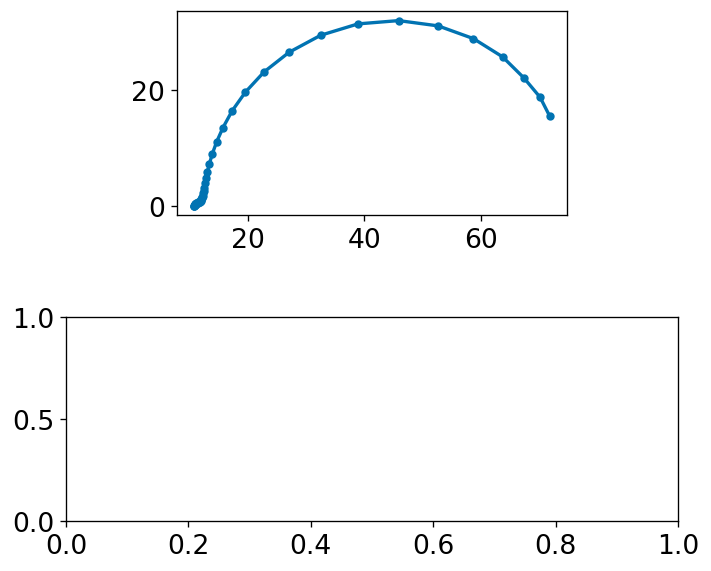

In [2]:
Rs_guess = 11

R_guess = 1.5
n_guess = 1
fs_guess = 10**1.3
Q_guess = 3.2e-5

R2_guess = 64
n2_guess = 1
fs2_guess = 10**0.5
Q2_guess = 1.2e-4

params = Parameters()
params.add('Rs', value=Rs_guess, min=9, max=14)

params.add('R', value=R_guess, min=1, max=4)
params.add('n', value=n_guess, min=.65, max=1.2)
#params.add('fs', value=fs_guess, min=10**0.5, max=10**6)
params.add('Q', value=Q_guess, min=10**-8, max=10**-3)

params.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params.add('n2', value=n2_guess, min=.65, max=1.2)
#params.add('fs2', value=fs2_guess, min=10**-2, max=10**3)
params.add('Q2', value=Q2_guess, min=10**-8, max=10**-3)

ex1.EIS_fit(params=params, circuit='R-RQ-RQ', weight_func='modulus', nan_policy="raise") 
ex1.EIS_plot(legend='potential', bode='on',fitting="on")


In [3]:
from PyEIS import *

f_range = freq_gen(f_start=10**6, f_stop=0.01, pts_decade=7)
print(f_range[0][:4]) #First 5 points in the freq. array
print()
print(f_range[1][:4]) #First 5 points in the angular freq. array

RsRQRQ_example = EIS_sim(frange=f_range[0], circuit=cir_RsRQRQ(w=f_range[1], Rs=Rs_guess, R=R_guess, n=n_guess, Q=Q_guess, R2=R2_guess, n2=n2_guess, Q2=Q2_guess), bode='im', legend='on')


TypeError: 'numpy.float64' object cannot be interpreted as an integer